In [1]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import matplotlib as mpl
plt.rcParams['pcolor.shading'] = 'auto'
mpl.rcParams['figure.dpi'] = 600
mpl.rc('font', family='Times New Roman', size=10)
mpl.rcParams['axes.linewidth'] = 0.2
plt.rcParams.update({"mathtext.fontset": "stix"})

def plot_region(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), rim: int=9, halo: T.Tuple[int, int]=(7,7), **kwargs):
    """
    Plots a LAM region, including its rim and halo
    """
    
    corners = draw_box_centre_size(ax, name, centre, res, size, pole, **kwargs)
    
    rim_size = [size[0]-rim*2, size[1]-rim*2]
    draw_box_centre_size(ax, name + '_rim', centre, res, rim_size, pole, ls='--', **kwargs)
    
    halo_size = [size[0]+halo[0]*2, size[1]+halo[1]*2]
    draw_box_centre_size(ax, name + '_halo', centre, res, halo_size, pole, ls=':', **kwargs)

    return corners

def draw_box_centre_size(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its centre and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    draw_box_corners(ax, name, corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2], pole=pole, **kwargs)

    return [centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2]

def draw_box_corners(ax, name: str, corners: T.Tuple[float, float, float, float], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its corners
    """
    x0,x1,y0,y1 = corners
    
    lons = numpy.linspace(x0,x1)
    lats = numpy.linspace(y0,y1)
        
    crs = ccrs.RotatedGeodetic(pole[1], pole[0])
    ax.plot(lons, [y0]*lons.size, transform=crs, **kwargs, label=name) 
    ax.plot(lons, [y1]*lons.size, transform=crs, **kwargs) 
    ax.plot([x0]*lats.size, lats, transform=crs, **kwargs) 
    ax.plot([x1]*lats.size, lats, transform=crs, **kwargs)


def print_corners(centre,res,size):
    """
    print corners of domain for a centre, res and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2]

    print (f'For {centre} with {res} and {size}: \ncoords = {corners[0]:.3f}, {corners[1]:.3f}, {corners[2]:.3f}, {corners[3]:.3f}')


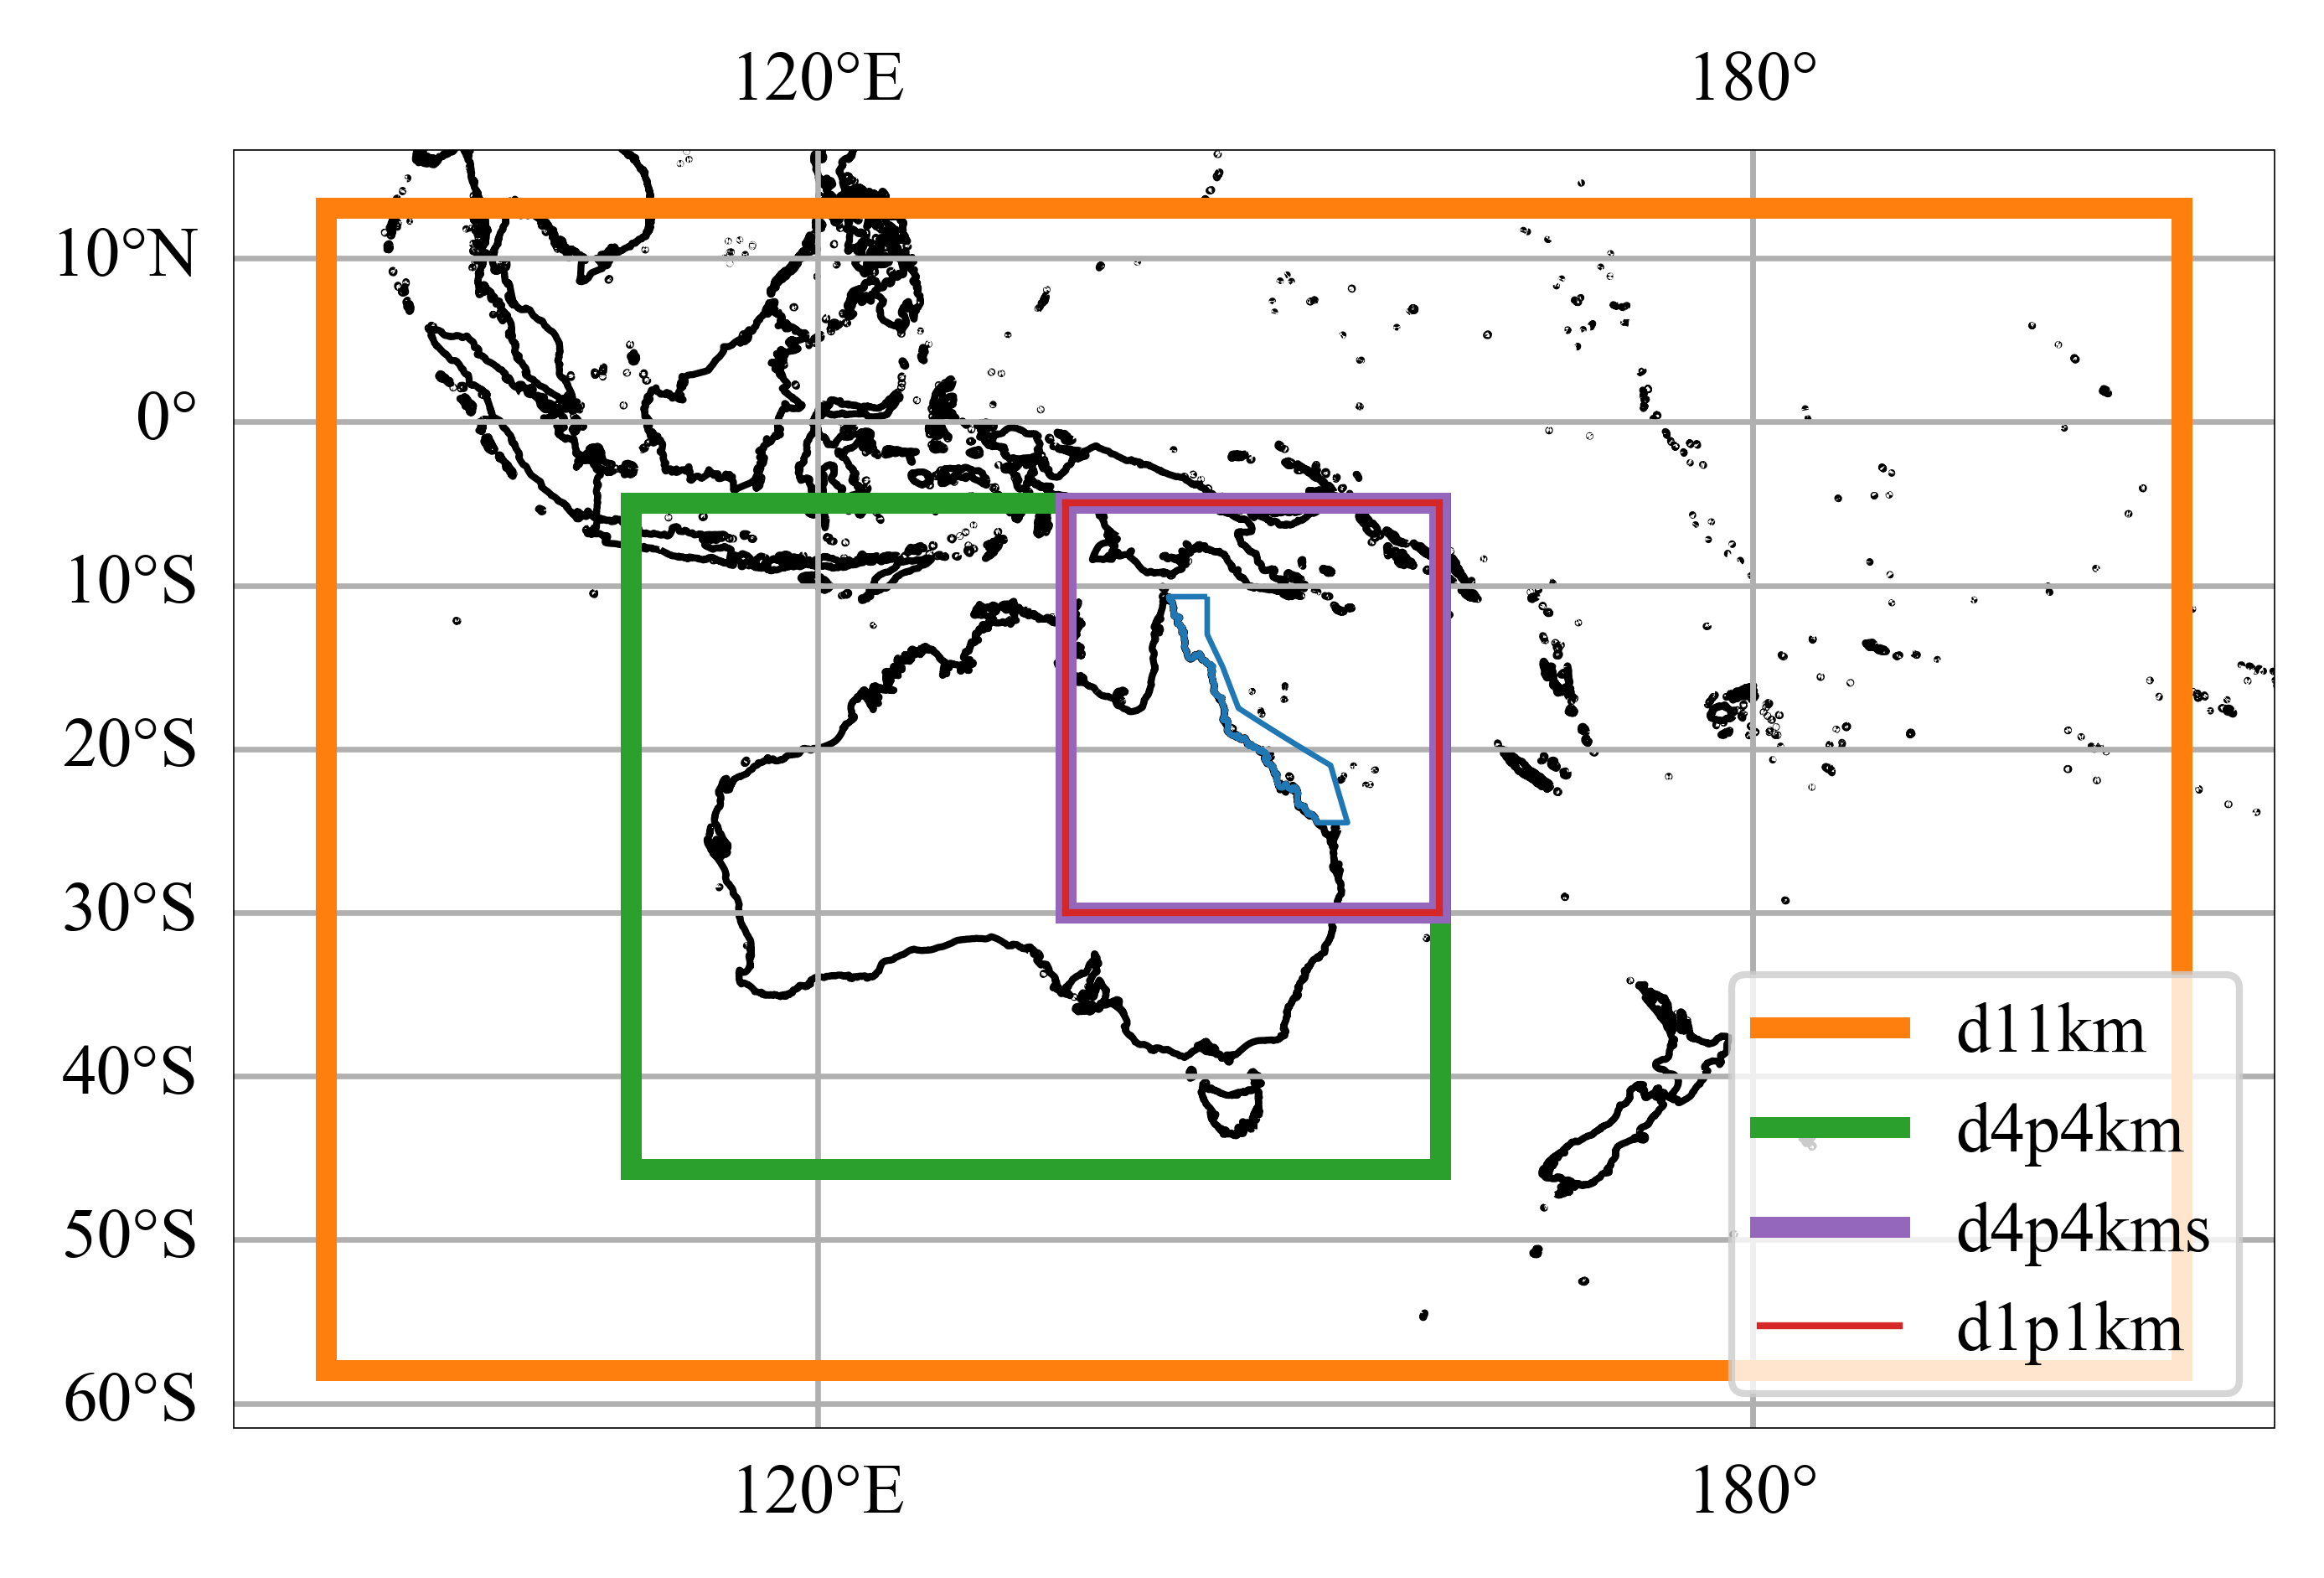

In [2]:
plt.figure(figsize=np.array([12, 8]) / 2.54)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.gridlines(draw_labels=True)

draw_box_corners(ax, 'd11km', corners=[88.48,   207.39+0.11,  12.98+0.11,  -57.97], color='tab:orange',linewidth=3)
draw_box_corners(ax, 'd4p4km', corners=[108.02,  159.9+0.04,  -5.01+0.04,  -45.69], color='tab:green',linewidth=3)
draw_box_corners(ax, 'd4p4kms', corners=[135.9,   159.9,  -5.01+0.04,  -30.01], color='tab:purple',linewidth=3)
draw_box_corners(ax, 'd1p1km', corners=[135.9,   159.9,  -5.01+0.04,  -30.01], color='tab:red',linewidth=1)

import geopandas as gpd
gbr_shp = gpd.read_file('/home/563/qg8515/data/others/Great_Barrier_Reef_Marine_Park_Boundary/Great_Barrier_Reef_Marine_Park_Boundary.shp')
gbr_shp.plot(ax=ax, edgecolor='tab:blue', facecolor='none', lw=0.8, zorder=2, transform=ccrs.PlateCarree())

ax.coastlines('10m')
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig('/home/563/qg8515/figures/test.png')

In [2]:
(87.27 + 208.6)/2

147.935

In [3]:
(14.19-59.18)/2

-22.495